In [1]:
# install pygad
pip install pygad

SyntaxError: invalid syntax (<ipython-input-1-abc442211213>, line 2)

In [2]:
# Import libraies and data file
import pandas as pd
from sklearn.ensemble import RandomForestRegressor# Import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pygad
print(pygad.__version__)

Pinfin=pd.read_excel('pin fin data.xlsx')
Pinfin.head()

2.16.3


,Design No.,x1,x2,x3,x4,x5,x6,x7,λ,Re,Population size,Temperature,Pressure drop,Stress,Fitness value
0,1,1.4,1.4,3.0,1.9,1.6,1.7,1.8,0.2,3046,15,317.9,57.64,12.38,121.22
1,1,1.4,1.4,3.0,1.9,1.6,1.7,1.8,0.2,4687,15,314.2,128.30,12.38,191.14
2,1,1.4,1.4,3.0,1.9,1.6,1.7,1.8,0.2,7030,15,311.2,278.80,12.38,341.04
3,1,1.4,1.4,3.0,1.9,1.6,1.7,1.8,0.2,9374,15,309.4,487.50,12.38,549.38
4,1,1.4,1.4,3.0,1.9,1.6,1.7,1.8,0.2,11717,15,308.1,754.30,12.38,815.92


In [3]:
# Check the dimension of data array
Pinfin.shape

(180, 15)

In [4]:
# Drop columns of the output variables (make an input variable array)
# Create output label arrays
Pinfin1=Pinfin.drop(['Pressure drop','Population size','λ','Fitness value','Temperature','Stress'],axis='columns')
xVar=Pinfin1.drop(Pinfin1.columns[0],axis='columns')
yVar1=Pinfin["Temperature"]
yVar2=Pinfin["Pressure drop"]
yVar=pd.concat([yVar1,yVar2],axis='columns')

# print input matrix
xVar.head()

,x1,x2,x3,x4,x5,x6,x7,Re
0,1.4,1.4,3.0,1.9,1.6,1.7,1.8,3046
1,1.4,1.4,3.0,1.9,1.6,1.7,1.8,4687
2,1.4,1.4,3.0,1.9,1.6,1.7,1.8,7030
3,1.4,1.4,3.0,1.9,1.6,1.7,1.8,9374
4,1.4,1.4,3.0,1.9,1.6,1.7,1.8,11717


In [5]:
# print output matrix
yVar.head()

,Temperature,Pressure drop
0,317.9,57.64
1,314.2,128.30
2,311.2,278.80
3,309.4,487.50
4,308.1,754.30


In [6]:
# Split arrys into random train and test subset
# train_size: proportion of the dataset to include in the train split
# random_state: controls the shuffling applied to the data before applyinng the split; pass an integer for 'reproducible' output
xTrain,xTest,yTrain,yTest=train_test_split(xVar,yVar,train_size=0.8,random_state=38)
xTrain.head()

,x1,x2,x3,x4,x5,x6,x7,Re
98,2.1,2.8,1.5,2.5,3.0,2.9,1.4,9374
128,1.1,1.1,1.6,2.9,3.5,3.1,1.3,9374
156,2.6,3.3,2.8,2.9,3.3,1.2,3.0,4687
37,1.4,1.2,1.4,1.6,1.0,2.1,1.4,7030
49,1.4,1.2,1.0,2.5,1.7,2.1,2.2,11717


In [7]:
# Crate RandomForestRegressor model

model=RandomForestRegressor(n_estimators=100,criterion="mse",random_state=39)

In [8]:
# Training RandomForest Model
model.fit(xTrain,yTrain)

RandomForestRegressor(random_state=39)

In [9]:
# Predict for training set
yyTrain = model.predict(xTrain)
#print(yyTrain)

In [10]:
# Print actual values of train set
# yComp=np.concatenate((xTrain,yTrain,yyTrain),axis=1)
yComp=np.concatenate((yTrain,yyTrain),axis=1)
np.set_printoptions(precision=1,suppress=True)
yComp

array([[ 307.1,  740.3,  307.1,  789.4],
       [ 307.2,  515.9,  307.2,  536.5],
       [ 310.8,  286.6,  311.3,  257.3],
       [ 313.8,  167.9,  313.7,  169. ],
       [ 308.6,  617.3,  308.7,  604.1],
       [ 311.9,  227.4,  312.1,  218.9],
       [ 307.4,  516.1,  307.4,  531.9],
       [ 311.2,  278.8,  311.4,  267.2],
       [ 309.9,  398.2,  310.1,  386.6],
       [ 308.3,  618.4,  308.3,  629.2],
       [ 311.1,  134.9,  311. ,  136.2],
       [ 313.1,  139.1,  312.7,  150.8],
       [ 309.4,  487.5,  309.5,  472.5],
       [ 312.5,   93.9,  313. ,   97.7],
       [ 314.2,  128.3,  314.4,  124.6],
       [ 314.2,  128.3,  314.4,  124.6],
       [ 308.8,  308.3,  308.9,  318.3],
       [ 311.1,  314.1,  310.9,  328. ],
       [ 316.5,   62.7,  316.6,   64.4],
       [ 309.3,  538.9,  309.2,  558.4],
       [ 306.4,  990.6,  306.5,  931.8],
       [ 306.3,  797.8,  306.4,  812.6],
       [ 310.4,  152.7,  310.8,  148.8],
       [ 310.2,  166.1,  310.9,  180. ],
       [ 311.4, 

In [11]:
# Predict for test set
yyTest = model.predict(xTest)

In [12]:
# Print actual values of test set
yComp=np.concatenate((xTest,yTest,yyTest),axis=1)
np.set_printoptions(precision=1,suppress=True)
yComp

array([[    1.1,     1.2,     1.4,     1.6,     1. ,     2.1,     1.3,
         4687. ,   317.9,    73.7,   317.4,    82.8],
       [    1.1,     1.5,     1.6,     2.9,     3.5,     3.1,     1.3,
         7030. ,   308.3,   317.5,   308.9,   308.3],
       [    1.1,     1.2,     1.4,     1.6,     1. ,     2.1,     1.3,
         3046. ,   322.9,    34.1,   322.1,    37.4],
       [    1.4,     2.9,     1.1,     2.6,     1.6,     3.1,     1.3,
         4687. ,   313.8,   127.1,   313.1,   141.5],
       [    1.4,     1.1,     2.7,     1.2,     1.2,     2.4,     1.6,
        11717. ,   308.9,   593.8,   308.9,   574.4],
       [    1.1,     1.5,     1.6,     2.9,     3.5,     3.1,     1.3,
         3046. ,   313.4,    65.1,   313.9,    63.2],
       [    1.4,     2.8,     1.5,     2.6,     3. ,     2.9,     1.4,
         4687. ,   310.7,   167. ,   311.4,   156.7],
       [    1.1,     1.2,     1.6,     2.3,     2.3,     3.5,     2.6,
         3046. ,   316.5,    48.4,   316.5,    59.1],


In [13]:
# Evaluate errors of training set
mae=metrics.mean_absolute_error(yTrain,yyTrain)
mse=metrics.mean_squared_error(yTrain,yyTrain)
rsq=metrics.r2_score(yTrain["Temperature"],yyTrain[:,0])
rsq1=metrics.r2_score(yTrain["Pressure drop"],yyTrain[:,1])
print(mae,mse,rsq,rsq1)

9.089894529320993 806.3718411126468 0.9929539583183319 0.987812941322877


In [14]:
# Evaluate errors of test set
mae=metrics.mean_absolute_error(yTest,yyTest)
mse=metrics.mean_squared_error(yTest,yyTest)
rsq=metrics.r2_score(yTest["Temperature"],yyTest[:,0])
rsq1=metrics.r2_score(yTest["Pressure drop"],yyTest[:,1])
print(mae,mse,rsq,rsq1)

17.155815679012274 1567.186935512567 0.9838836403220077 0.979311815805276


In [15]:
Temperature_predict=yyTest[:,0]
Temperature_real=yTest["Temperature"]
Pressuredrop_predict=yyTest[:,1]
Pressuredrop_real=yTest["Pressure drop"]

Temperature_predict_train=yyTrain[:,0]
Temperature_real_train=yTrain["Temperature"]
Pressuredrop_predict_train=yyTrain[:,1]
Pressuredrop_real_train=yTrain["Pressure drop"]

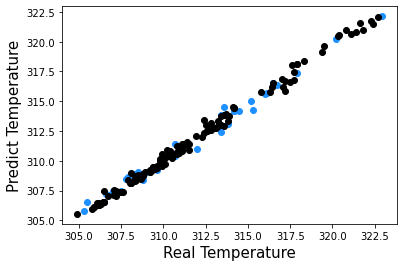

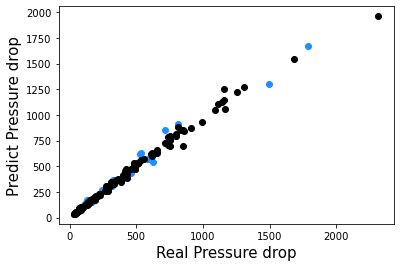

In [16]:
plt.scatter(Temperature_real,Temperature_predict,color='dodgerblue')
plt.scatter(Temperature_real_train,Temperature_predict_train,color='black')
#plt.plot(Temperature_real,Temperature_real,color='red')
plt.xlabel('Real Temperature',size=15)
plt.ylabel('Predict Temperature',size=15)
plt.show()

plt.scatter(Pressuredrop_real,Pressuredrop_predict,color='dodgerblue')
plt.scatter(Pressuredrop_real_train,Pressuredrop_predict_train,color='black')
#plt.plot(Pressuredrop_real_train,Pressuredrop_real_train,color='red')
plt.xlabel('Real Pressure drop',size=15)
plt.ylabel('Predict Pressure drop',size=15)
plt.show()


In [17]:
# Genetic Algorithm

In [232]:
# Create fitness function

def fitness_fuction(y,solution_idx):
    # y array of 7 optimized variables (x coordinate of pin fin)
    # Re=3046, lambda=5
    # Re=4687, lambda=14
    # Re=7030, lambda=35
    # Re=9374, lambda=65
    # Re=11717, lambda=130
    # adjust variable y if exceeding lower bound 1 or upper bound 3.5
    if y[0]<1:
        y[0]=1
    elif y[0]>3.5:
        y[0]=3.5
    else:
        y[0]=y[0]
    
    if y[1]<1:
        y[1]=1
    elif y[1]>3.5:
        y[1]=3.5
    else:
        y[1]=y[1]

    if y[2]<1:
        y[2]=1
    elif y[2]>3.5:
        y[2]=3.5
    else:
        y[2]=y[2]

    if y[3]<1:
        y[3]=1
    elif y[3]>3.5:
        y[3]=3.5
    else:
        y[3]=y[3]
        
    if y[4]<1:
        y[4]=1
    elif y[4]>3.5:
        y[4]=3.5
    else:
        y[4]=y[4]

    if y[5]<1:
        y[5]=1
    elif y[5]>3.5:
        y[5]=3.5
    else:
        y[5]=y[5]

    if y[6]<1:
        y[6]=1
    elif y[6]>3.5:
        y[6]=3.5
    else:
        y[6]=y[6]
    
    # import variable array y generated in GA to trained model to predict
    
    data = {'x1':[y[0]],'x2':[y[1]],'x3':[y[2]],'x4':[y[3]],'x5':[y[4]],'x6':[y[5]],'x7':[y[6]],'Re':3040} 
    df1 = pd.DataFrame(data)
    
    
    # using trained model to predict temperature "(TP_val[0,0],1)"" and pressure drop "TP_val[0,1],1)"
    
    TP_val=np.array(model.predict(df1))
    f_val=round(TP_val[0,0],1)+0*round(TP_val[0,1],1)  # fitness function in COMSOL&GA
    fi=100/f_val                                        # reverse of fitness function cause GA in python will maximize fi,meaning minimize f_val 
    
    return fi


In [233]:
# create GA model and adjust parameters

ga_instance = pygad.GA(num_generations=500,            # iteration number
                       sol_per_pop = 7,               # variables number
                       num_genes = 50,                 # population size
                       num_parents_mating=1, 
                       fitness_func=fitness_fuction, # fitness function
                       init_range_low=1,              # lower bound
                       init_range_high=3.5,           # upper bound
                       mutation_percent_genes=1)

C:\Users\USER\anaconda3\lib\site-packages\pygad\pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=1) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [234]:
ga_instance.run()

C:\Users\USER\anaconda3\lib\site-packages\pygad\pygad.py:3142: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


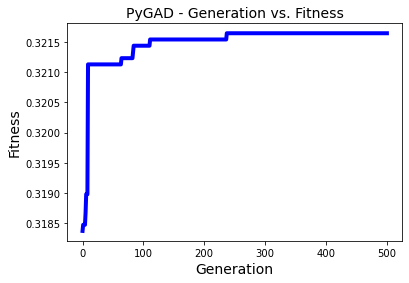

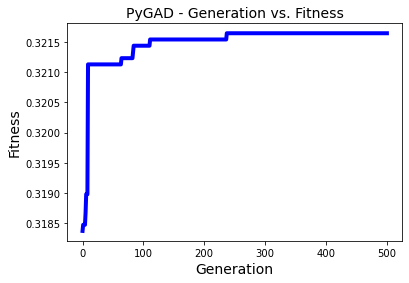

In [235]:
ga_instance.plot_result(linewidth=4,color='blue')

In [236]:
print("Initial Population")
print(ga_instance.initial_population)

Initial Population
[[1.6 2.  2.9 1.7 1.5 2.6 1.2 2.9 1.7 2.4 3.3 3.1 1.9 2.6 1.7 1.7 2.4 3.
  1.7 1.1 2.3 1.6 3.2 1.8 3.3 2.8 3.2 2.6 1.  2.  2.6 1.  1.6 2.2 1.9 2.5
  3.3 2.6 2.5 2.8 2.3 3.4 2.1 1.5 2.7 2.6 1.2 3.  2.8 3.1]
 [2.3 1.8 2.7 1.3 3.  2.1 1.9 2.8 1.  3.  3.4 2.6 1.  2.5 2.  2.5 2.2 3.1
  1.9 2.6 1.1 1.9 3.1 2.  1.1 3.  1.  1.6 1.1 1.1 1.1 1.  1.7 1.4 2.  1.5
  3.5 2.1 3.  3.1 2.5 1.9 2.5 2.8 2.1 2.8 1.7 2.8 1.3 2.2]
 [1.4 2.9 2.8 2.6 1.5 2.5 1.5 3.3 3.  3.2 1.8 1.7 1.5 3.4 3.  3.1 2.3 2.5
  1.9 2.9 1.2 2.1 1.1 2.6 2.  1.7 1.1 3.3 3.  1.6 3.5 1.7 3.  1.3 1.3 3.2
  3.3 1.6 1.9 1.  3.2 3.1 1.8 1.1 1.2 1.9 2.9 2.8 3.3 1.6]
 [1.5 2.2 2.1 2.5 1.  2.1 2.8 2.1 1.3 2.  3.  2.1 1.4 1.  3.3 1.3 2.8 2.1
  1.2 2.5 2.6 3.2 1.6 2.3 1.9 1.3 3.3 2.3 3.4 3.  2.5 2.8 1.5 1.2 2.8 2.9
  1.4 2.2 1.8 1.4 1.  1.5 2.8 1.9 2.3 3.3 1.3 1.1 2.9 2.9]
 [2.5 1.9 2.2 1.7 1.  3.1 3.2 1.6 3.3 1.3 3.5 1.4 3.  3.5 2.5 1.7 2.3 1.6
  3.2 1.9 1.6 1.9 1.9 2.2 1.3 1.5 3.1 1.1 2.7 1.2 3.4 3.3 1.1 3.4 3.5 2.5
  1.2 

In [237]:
y,solution_fitnesstion,solution_idx= ga_instance.best_solution()

In [238]:
# Print best fitness value

print("Maximum fitness value = {solution_fitnesstion}".format(solution_fitnesstion=solution_fitnesstion))

Maximum fitness value = 0.321646831778707


In [239]:
# print optimized variables

print("x1 = {variable1}".format(variable1=y[0])) 
print("x2 = {variable2}".format(variable2=y[1]))
print("x3 = {variable3}".format(variable3=y[2]))
print("x4 = {variable4}".format(variable4=y[3]))
print("x5 = {variable5}".format(variable5=y[4]))
print("x6 = {variable6}".format(variable6=y[5]))
print("x7 = {variable7}".format(variable7=y[6]))

x1 = 3.5
x2 = 3.5
x3 = 2.865986465487699
x4 = 3.0333387201617086
x5 = 3.264878212171247
x6 = 3.5
x7 = 2.6357144646240593


In [240]:
# Check temperature and pressure drop of optimized variables predicted by ML 
y=[y[0],y[1],y[2],y[3],y[4],y[5],y[6]]  
data = {'x1':[y[0]],'x2':[y[1]],'x3':[y[2]],'x4':[y[3]],'x5':[y[4]],'x6':[y[5]],'x7':[y[6]],'Re':3040} 
df1 = pd.DataFrame(data)
    
TP_val=np.array(model.predict(df1))
#f_val=35*round(TP_val[0,0],1)+round(TP_val[0,1],1)
print(round(TP_val[0,0],1),round(TP_val[0,1],1))

310.9 179.3
